## This notebook demonstrates how to train an action recognition model on the `UCF-101` dataset.

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ucf101/UCF101/UCF-101/HorseRace/v_HorseRace_g23_c05.avi
/kaggle/input/ucf101/UCF101/UCF-101/HorseRace/v_HorseRace_g18_c05.avi
/kaggle/input/ucf101/UCF101/UCF-101/HorseRace/v_HorseRace_g10_c01.avi
/kaggle/input/ucf101/UCF101/UCF-101/HorseRace/v_HorseRace_g18_c04.avi
/kaggle/input/ucf101/UCF101/UCF-101/HorseRace/v_HorseRace_g16_c01.avi
/kaggle/input/ucf101/UCF101/UCF-101/HorseRace/v_HorseRace_g04_c02.avi
/kaggle/input/ucf101/UCF101/UCF-101/HorseRace/v_HorseRace_g25_c01.avi
/kaggle/input/ucf101/UCF101/UCF-101/HorseRace/v_HorseRace_g05_c03.avi
/kaggle/input/ucf101/UCF101/UCF-101/HorseRace/v_HorseRace_g02_c02.avi
/kaggle/input/ucf101/UCF101/UCF-101/HorseRace/v_HorseRace_g12_c03.avi
/kaggle/input/ucf101/UCF101/UCF-101/HorseRace/v_HorseRace_g11_c01.avi
/kaggle/input/ucf101/UCF101/UCF-101/HorseRace/v_HorseRace_g07_c02.avi
/kaggle/input/ucf101/UCF101/UCF-101/HorseRace/v_HorseRace_g06_c05.avi
/kaggle/input/ucf101/UCF101/UCF-101/HorseRace/v_HorseRace_g05_c01.avi
/kaggle/input/ucf101

KeyboardInterrupt: 

# Import packages

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import numpy as np
from tqdm import tqdm
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
import itertools
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
class_map = {
    'ApplyEyeMakeup': 1,
    'ApplyLipstick': 1,
    'Basketball': 2,
    'BasketballDunk': 2,
    'CricketBowling': 3,
    'CricketShot': 3,
    'PlayingCello': 4,
    'PlayingDaf': 4,
    'PlayingDhol': 4,
    'PlayingFlute': 4,
    'PlayingGuitar': 4,
    'PlayingPiano': 4,
    'PlayingSitar': 4,
    'PlayingTabla': 4,
    'PlayingViolin': 4,
    'FieldHockeyPenalty' : 5,
    'FloorGymnastics' : 6,
    'IceDancing' : 7,
    'JavelinThrow' : 8,
    'LongJump' : 21,
    'PullUps' : 9,
    'PushUps' : 10,
    'Rafting' : 11,
    'SalsaSpin' : 12,
    'Shotput' : 13,
    'SkateBoarding' : 14,
    'SkyDiving' : 15,
    'SoccerJuggling' : 16,
    'SoccerPenalty' : 17,
    'SumoWrestling' : 18,
    'WalkingWithDog' : 19,
    'WritingOnBoard' : 20
}

In [ ]:
import os
video_count = 0

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print("\n", filename)
        if(len(filename.split('_')) > 1):
        
              name_split = filename.split("_")[1]
              if name_split in class_map:
                   video_count += 1
                   print("\n",name_split)

                    
print("\ntotal videos for the required classes is: ", video_count)                    
                    
        
        
        
        
    

## Modifying the train/test split text files for index: 01

### For train set

In [3]:
split_file_path = '/kaggle/input/ucf101/UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist/trainlist01.txt'

with open(split_file_path, 'r') as f:
    lines_train = f.readlines()

    
for line in lines_train:
    print("\n",line)
    



 ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c03.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c04.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c05.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c01.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c02.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c03.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c04.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c05.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c06.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c07.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c01.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c02.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c03.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c04.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c05.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c01.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c02.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c03.avi 1


 ApplyEyeMakeup/v_A

In [4]:
## creating new train list text file

new_train_lines = []

for line in lines_train:
    parts = line.split(" ")
    if(len(parts) >= 2):
        video_path, label = parts
        class_name = video_path.split("/")[0]
        
        if class_name in class_map:
            new_label = class_map.get(class_name)
            new_line = f"{video_path} {new_label}\n"
            print(new_line,"\n")
            new_train_lines.append(new_line)
            

ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c03.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c04.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c05.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c01.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c02.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c03.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c04.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c05.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c06.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c07.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c01.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c02.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c03.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c04.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c05.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c01.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c02.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c03.avi 1
 

ApplyEyeMakeup/v_App

In [5]:
## Saving the changes in new text file

with open("/kaggle/working/new_train_list_1.txt", 'x') as f:
    f.writelines(new_train_lines)
    
with open("/kaggle/working/new_train_list_1.txt", 'r') as f:  
    print(f.read())

ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c05.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c05.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c06.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c07.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c05.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g1

### For test set

In [6]:
split_file_path_train = '/kaggle/input/ucf101/UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist/testlist01.txt'

with open(split_file_path_train, 'r') as f:
    lines_test = f.readlines()

    
for line in lines_test:
    print("\n",line)


 ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c06.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c01.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c02.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c03.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c04.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c01.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c02.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c03.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c04.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c05.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c06.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c01.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c02.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c03.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c04.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c05.avi


 ApplyEyeMak

In [7]:
## creating new test list text file

new_test_lines = []

for line in lines_test:
    parts = line.split(" ")
    if(len(parts) == 1):
        video_path = parts[0]
        class_name = video_path.split("/")[0]
        
        if class_name in class_map:
            new_label = class_map.get(class_name)
            #print("\n", new_label)
            new_line = line.strip() + ' ' + str(new_label) + '\n'
            #print(new_line,"\n")
            new_test_lines.append(new_line)
            
            
print('\ntotal number of videos in test set is: ',len(new_test_lines))          


total number of videos in test set is:  1214


In [9]:
## Saving the changes in new text file

with open("/kaggle/working/new_test_list_1.txt", 'x') as f:
    f.writelines(new_test_lines)
    
with open("/kaggle/working/new_test_list_1.txt", 'r') as f:  
    print(f.read())

FileExistsError: [Errno 17] File exists: '/kaggle/working/new_test_list_1.txt'

## Modifying the train/test split text files for index: 02

## For train set

In [10]:
split_file_path = '/kaggle/input/ucf101/UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist/trainlist02.txt'

with open(split_file_path, 'r') as f:
    lines_train = f.readlines()

    
for line in lines_train:
    print("\n",line)
    


 ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c06.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c01.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c02.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c03.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c04.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c01.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c02.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c03.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c04.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c05.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c06.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c01.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c02.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c03.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c04.avi 1


 ApplyEyeMakeup/v_A

In [11]:
## creating new train list text file

new_train_lines = []

for line in lines_train:
    parts = line.split(" ")
    if(len(parts) >= 2):
        video_path, label = parts
        class_name = video_path.split("/")[0]
        
        if class_name in class_map:
            new_label = class_map.get(class_name)
            new_line = f"{video_path} {new_label}\n"
            print(new_line,"\n")
            new_train_lines.append(new_line)

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c06.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c01.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c02.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c03.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c04.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c01.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c02.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c03.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c04.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c05.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c06.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c01.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c02.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c03.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c04.avi 1
 

ApplyEyeMakeup/v_App

In [12]:
## Saving the changes in new text file

with open("/kaggle/working/new_train_list_2.txt", 'x') as f:
    f.writelines(new_train_lines)
    
with open("/kaggle/working/new_train_list_2.txt", 'r') as f:  
    print(f.read())

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c06.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c05.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c06.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c05.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g0

## For test set

In [13]:
split_file_path_train = '/kaggle/input/ucf101/UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist/testlist02.txt'

with open(split_file_path_train, 'r') as f:
    lines_test = f.readlines()

    
for line in lines_test:
    print("\n",line)


 ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c03.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c04.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c05.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c01.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c02.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c03.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c04.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c05.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c06.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c07.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c01.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c02.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c03.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c04.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c05.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c01.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c02.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c03.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c04.avi


 ApplyEyeMak

In [14]:
## creating new test list text file

new_test_lines = []

for line in lines_test:
    parts = line.split(" ")
    if(len(parts) == 1):
        video_path = parts[0]
        class_name = video_path.split("/")[0]
        
        if class_name in class_map:
            new_label = class_map.get(class_name)
            #print("\n", new_label)
            new_line = line.strip() + ' ' + str(new_label) + '\n'
            #print(new_line,"\n")
            new_test_lines.append(new_line)
            
            
print('\ntotal number of videos in test set is: ',len(new_test_lines)) 


total number of videos in test set is:  1185


In [15]:
## Saving the changes in new text file

with open("/kaggle/working/new_test_list_2.txt", 'x') as f:
    f.writelines(new_test_lines)
    
with open("/kaggle/working/new_test_list_2.txt", 'r') as f:  
    print(f.read())

ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c05.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c05.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c06.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c07.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c05.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g1

## Modifying the train/test split text files for index: 03

## For train set

In [16]:
split_file_path = '/kaggle/input/ucf101/UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist/trainlist03.txt'

with open(split_file_path, 'r') as f:
    lines_train = f.readlines()

    
for line in lines_train:
    print("\n",line)


 ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c06.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c01.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c02.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c03.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c04.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c01.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c02.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c03.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c04.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c05.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c06.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c01.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c02.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c03.avi 1


 ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c04.avi 1


 ApplyEyeMakeup/v_A

In [17]:
## creating new train list text file

new_train_lines = []

for line in lines_train:
    parts = line.split(" ")
    if(len(parts) >= 2):
        video_path, label = parts
        class_name = video_path.split("/")[0]
        
        if class_name in class_map:
            new_label = class_map.get(class_name)
            new_line = f"{video_path} {new_label}\n"
            print(new_line,"\n")
            new_train_lines.append(new_line)

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c06.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c01.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c02.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c03.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c04.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c01.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c02.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c03.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c04.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c05.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c06.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c01.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c02.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c03.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c04.avi 1
 

ApplyEyeMakeup/v_App

In [18]:
## Saving the changes in new text file

with open("/kaggle/working/new_train_list_3.txt", 'x') as f:
    f.writelines(new_train_lines)
    
with open("/kaggle/working/new_train_list_3.txt", 'r') as f:  
    print(f.read())

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c06.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c05.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c06.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c05.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g0

## For test set

In [19]:
split_file_path_train = "/kaggle/input/ucf101/UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist/testlist03.txt"

with open(split_file_path_train, 'r') as f:
    lines_test = f.readlines()

    
for line in lines_test:
    print("\n",line)


 ApplyEyeMakeup/v_ApplyEyeMakeup_g15_c01.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g15_c02.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g15_c03.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g15_c04.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g15_c05.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g15_c06.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g15_c07.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g16_c01.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g16_c02.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g16_c03.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g16_c04.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g16_c05.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g17_c01.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g17_c02.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g17_c03.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g17_c04.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g17_c05.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g18_c01.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g18_c02.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g18_c03.avi


 ApplyEyeMakeup/v_ApplyEyeMakeup_g18_c04.avi


 ApplyEyeMak

In [20]:
## creating new train list text file

new_train_lines = []

for line in lines_train:
    parts = line.split(" ")
    if(len(parts) >= 2):
        video_path, label = parts
        class_name = video_path.split("/")[0]
        
        if class_name in class_map:
            new_label = class_map.get(class_name)
            new_line = f"{video_path} {new_label}\n"
            print(new_line,"\n")
            new_train_lines.append(new_line)

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c06.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c01.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c02.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c03.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c04.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c01.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c02.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c03.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c04.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c05.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c06.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c01.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c02.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c03.avi 1
 

ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c04.avi 1
 

ApplyEyeMakeup/v_App

In [21]:
## Saving the changes in new text file

with open("/kaggle/working/new_test_list_3.txt", 'x') as f:
    f.writelines(new_train_lines)
    
with open("/kaggle/working/new_test_list_3.txt", 'r') as f:  
    print(f.read())

ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c06.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c05.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c06.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c01.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c02.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c03.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c04.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c05.avi 1
ApplyEyeMakeup/v_ApplyEyeMakeup_g0

# Finalizing training and validation set : 01

In [23]:
# For train set
train_video_path_1 = []
train_labels_1 = []

with open("/kaggle/working/new_train_list_1.txt", "r") as file:
  for line in file:

    path,label = line.strip().split(" ")
    train_video_path_1.append(path)
    train_labels_1.append(label)

train_video_path_1 = np.array(train_video_path_1)    


# For test set
test_video_path_1 = []
test_labels_1 = []

with open("/kaggle/working/new_test_list_1.txt", "r") as file:
  for line in file:
    path,label = line.strip().split(" ")
    test_video_path_1.append(path)
    test_labels_1.append(label)

test_video_path_1 = np.array(test_video_path_1)    


# One hot encoding of the labels

one_hot_1 = pd.get_dummies(train_labels_1)
train_label_onehot_1 = np.array(one_hot_1)

one_hot_1 = pd.get_dummies(test_labels_1)
test_label_onehot_1 = np.array(one_hot_1)

# Finalizing training and validation set : 02

In [24]:
# For train set
train_video_path_2 = []
train_labels_2 = []

with open("/kaggle/working/new_train_list_2.txt", "r") as file:
  for line in file:

    path,label = line.strip().split(" ")
    train_video_path_2.append(path)
    train_labels_2.append(label)

train_video_path_2 = np.array(train_video_path_2)    


# For test set
test_video_path_2 = []
test_labels_2 = []

with open("/kaggle/working/new_test_list_2.txt", "r") as file:
  for line in file:
    path,label = line.strip().split(" ")
    test_video_path_2.append(path)
    test_labels_2.append(label)

test_video_path_2 = np.array(test_video_path_2)    


# One hot encoding of the labels

one_hot_2 = pd.get_dummies(train_labels_2)
train_label_onehot_2 = np.array(one_hot_2)

one_hot_2 = pd.get_dummies(test_labels_2)
test_label_onehot_2 = np.array(one_hot_2)

# Finalizing training and validation set : 03

In [25]:
# For train set
train_video_path_3 = []
train_labels_3 = []

with open("/kaggle/working/new_train_list_3.txt", "r") as file:
  for line in file:

    path,label = line.strip().split(" ")
    train_video_path_3.append(path)
    train_labels_3.append(label)

train_video_path_3 = np.array(train_video_path_3)    


# For test set
test_video_path_3 = []
test_labels_3 = []

with open("/kaggle/working/new_test_list_3.txt", "r") as file:
  for line in file:
    path,label = line.strip().split(" ")
    test_video_path_3.append(path)
    test_labels_3.append(label)

test_video_path_3 = np.array(test_video_path_3)    


# One hot encoding of the labels

one_hot_3 = pd.get_dummies(train_labels_3)
train_label_onehot_3 = np.array(one_hot_3)

one_hot_3 = pd.get_dummies(test_labels_3)
test_label_onehot_3 = np.array(one_hot_3)

# PREPARING DATA GENERATORS

In [54]:
import cv2
import numpy as np
#from keras.utils import to_categorical

def video_data_generator(video_paths, labels, batch_size, num_classes, num_frames, frame_size):
    while True:
        # Shuffle the video paths and labels
        frame_dimension = frame_size[0]
        indices = np.arange(len(video_paths))
        np.random.shuffle(indices)
        video_paths = [video_paths[i] for i in indices]
        labels = [labels[i] for i in indices]

        folder_path = '/kaggle/input/ucf101/UCF101/UCF-101/'
        
        # Loop through the video paths in batches

        
        for i in range(0, len(video_paths), batch_size):
            # Load the video frames and resize them to 224x224
            frames = []
            video_batch = []
            for path in video_paths[i:i+batch_size]:

                  video_path =  os.path.join(folder_path, path)                        #path to the video
                  #print("\n",video_path)
                  video_capture = cv2.VideoCapture(video_path)

                 
                  num_frames_video = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
                  #print("\nNumber of frames: ",num_frames_video)
  
                  desired_num_frames = num_frames  # Change this value to extract more or fewer frames

                  step = num_frames_video // desired_num_frames

                  frames = []                                 #to store the frames of the video
                  frame_count = 1
                  for i in range(num_frames_video):
                         ret, frame = video_capture.read()
                         
                         if not ret:
                                 break
                         
                         if ((i % step == 0) and (frame_count <= desired_num_frames)):
                                    #print("\nFrame successful")
                                    frame_resized = cv2.resize(frame,frame_size) 
                                    #print(frame_resized)                                #resizing the frames
                                    # Normalizing the pixel values from 0 to 1
                                    frames = frames / 255
                                    frames.append(frame_resized)
                                    frame_count += 1
               
                  frames = np.array(frames)
                  video_batch.append(frames)
            
            labels_batch = labels[i:i+batch_size]
            video_batch =  np.array(video_batch)
            labels_batch = np.array(labels_batch)
            
            
            
            
            # Yield the data batch
            if(video_batch.shape == (batch_size, num_frames, frame_dimension, frame_dimension, 3)):
                  #print("\nVideo batch shape: ",video_batch.shape)
                  #print("\nVideo label shape: ",labels_batch.shape)
                  yield video_batch, labels_batch
            else:
                  #print("\nShapes of array are not correct")
                  continue 

# 1. ConvLSTM layers

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv3D, MaxPool3D, Flatten, Dense, Dropout, LSTM, ConvLSTM2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Set the path to the UCF101 dataset
# data_dir = '/path/to/UCF101'

# Set the parameters for the data generator
batch_size = 5
num_frames = 24
num_classes = 21
frame_dim = 20
frame_size = (frame_dim, frame_dim)
epochs = 5


# Define the dictionary that maps class names to integer labels
class_dict = class_map

# For train set
train_video_path = []
train_labels = []

with open("/kaggle/working/new_train_list_2.txt", "r") as file:
  for line in file:

    path,label = line.strip().split(" ")
    train_video_path.append(path)
    train_labels.append(label)

train_video_path = np.array(train_video_path)    


# For test set
test_video_path = []
test_labels = []

with open("/kaggle/working/new_test_list_2.txt", "r") as file:
  for line in file:
    path,label = line.strip().split(" ")
    test_video_path.append(path)
    test_labels.append(label)

test_video_path = np.array(test_video_path)    


# One hot encoding of the labels

one_hot = pd.get_dummies(train_labels)
train_label_onehot = np.array(one_hot)

one_hot = pd.get_dummies(test_labels)
test_label_onehot = np.array(one_hot)



# Define the data generator for the train set
train_data_generator = video_data_generator(train_video_path, train_label_onehot, batch_size, num_classes, num_frames, frame_size)

# Define the data generator for the test set
test_data_generator = video_data_generator(test_video_path, test_label_onehot, batch_size, num_classes, num_frames, frame_size)

# Define the ConvLSTM model
model = Sequential()
model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3), input_shape=(num_frames, frame_dim, frame_dim, 3), padding='same', return_sequences=True))
model.add(BatchNormalization())
#model.add(ConvLSTM2D(filters=32, kernel_size=(4, 4), padding='same', return_sequences=True))
#model.add(BatchNormalization())
#model.add(ConvLSTM2D(filters=32, kernel_size=(5, 5), padding='same', return_sequences=True))
#model.add(BatchNormalization())
#model.add(ConvLSTM2D(filters=32, kernel_size=(6, 6), padding='same', return_sequences=False))
#model.add(BatchNormalization())
model.add(Flatten())
#model.add(Dense(units=32, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))

model.summary()

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up a callback to save the best model weights
checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Train the model
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch=len(train_video_path) // batch_size,
                              validation_data=test_data_generator,
                              validation_steps=len(test_video_path) // batch_size,
                              epochs=epochs,
                              callbacks=[checkpoint])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_4 (ConvLSTM2D)  (None, 24, 20, 20, 16)    11008     
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 20, 20, 16)    64        
_________________________________________________________________
flatten_8 (Flatten)          (None, 153600)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 21)                3225621   
Total params: 3,236,693
Trainable params: 3,236,661
Non-trainable params: 32
_________________________________________________________________


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
 31/612 [>.............................] - ETA: 3:45 - loss: 33.5485 - accuracy: 0.0903

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


584/612 [===========================>..] - ETA: 11s - loss: 18.2803 - accuracy: 0.1168

# 2. VGG16 extracted features 

In [ ]:
import os 
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

def video_data_generator_VGG16(video_paths, labels, batch_size, num_classes, num_frames, frame_size, vgg):
    while True:
        # Shuffle the video paths and labels
        indices = np.arange(len(video_paths))
        np.random.shuffle(indices)
        video_paths = [video_paths[i] for i in indices]
        labels = [labels[i] for i in indices]

        folder_path = '/content/drive/MyDrive/UCF-101/'

        # Loop through the video paths in batches
        for i in range(0, len(video_paths), batch_size):
            #print("\n", i)
            # Load the video frames and resize them to frame_size
            video_batch = []
            for path in video_paths[i:i+batch_size]:
                video_path = os.path.join(folder_path, path)
                video_frames = []
                #video_features = []
                video_capture = cv2.VideoCapture(video_path)
                num_frames_video = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
                step = num_frames_video // num_frames
                for j in range(num_frames_video):
                    ret, frame = video_capture.read()
                    if not ret:
                        break
                    if (j % step == 0) and (len(video_frames) < num_frames):
                                print("\n", j)
                                #print("\nBefore resizing: ",frame)
                                frame_resized = cv2.resize(frame, frame_size)
                                #print("\nAfter resizing", frames_resized)
                                #print("\nFrame shape is: ",frame_resized.shape)
                                #features_frame = vgg.predict(frame_resized)
                                video_frames.append(frame_resized)
                                #video_features = np.vstack((video_features, features_frame))
                                #print("\nvideo features shape is: ",video_features.shape)
                video_capture.release()
                while len(video_frames) < num_frames:
                    video_frames.append(np.zeros(frame_size))
                video_frames = np.array(video_frames)
                #video_features = np.array(video_features)
                # Preprocess the frames using VGG16 preprocess_input function
                #video_frames = preprocess_input(video_frames)
                # Extract features using VGG16 model
                #print("\nVideo_features has size: ", video_frames.shape)
                video_features = vgg.predict(video_frames)
                #print("\nVideo_features has size: ", video_features.shape)
                video_features_reshaped = video_features.reshape(num_frames,7*7*512)
                video_batch.append(video_features_reshaped)
            labels_batch = np.array(labels[i:i+batch_size])
            video_batch = np.array(video_batch)
            #print("\nVideo_batch shape is: ", video_batch.shape)
            #print("\nlabels_batch shape is: ", labels_batch.shape)
            
            # Yield the data batch
            yield video_batch, labels_batch




In [ ]:
import os 
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

def video_data_generator_VGG16(video_paths, labels, batch_size, num_classes, num_frames, frame_size, vgg):
    while True:
        # Shuffle the video paths and labels
        indices = np.arange(len(video_paths))
        np.random.shuffle(indices)
        video_paths = [video_paths[i] for i in indices]
        labels = [labels[i] for i in indices]

        folder_path = '/content/drive/MyDrive/UCF-101/'
        temp_array = np.zeros((1,7,7,512))

        # Loop through the video paths in batches
        for i in range(0, len(video_paths), batch_size):
            #print("\n", i)
            # Load the video frames and resize them to frame_size
            video_batch = np.empty((0,num_frames,7,7,512))
            
            for path in video_paths[i:i+batch_size]:
                video_path = os.path.join(folder_path, path)
                #video_frames = []
                video_features = np.empty((0,7,7,512))
                video_capture = cv2.VideoCapture(video_path)
                num_frames_video = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
                step = num_frames_video // num_frames
                
                for j in range(num_frames_video):
                    
                    print("\n",j)
                    ret, frame = video_capture.read()
                    if not ret:
                        print("\nFrame not successful")
                        break
                        
                    print("\nFrame successful")    
                    if ((j % step == 0) and (len(video_features) < num_frames)):
                        frame_resized = cv2.resize(frame, frame_size)
                        frame_preprocessed = preprocess_input(frame_resized)
                        frame_feature = vgg.predict(frame_preprocessed)
                        print("\nFrame features has size: ",frame_feature.shape)
                        frame_feature = frame_feature.reshape((1,7,7,512))
                        video_features = np.append(video_features, frame_features, axis=0)
                               
                video_capture.release()
                #while len(video_features) < batch_size:
                    #video_features.append(video_features, temp_array, axis=0)
                #video_frames = np.array(video_frames)
                video_features = np.array(video_features)
                if video_features.shape != (num_frames,7,7,512):
                    print("\nBreaked")
                    break
                video_features = video_features.reshape((1,num_frames,7,7,512))
                print("\nVideo features shape is: ",video_features.shape)
                video_batch = np.append(video_batch, video_features, axis=0)
                # Preprocess the frames using VGG16 preprocess_input function
                #video_frames = preprocess_input(video_frames)
                # Extract features using VGG16 model
                #print("\nVideo_features has size: ", video_frames.shape)
                #video_features = vgg.predict(video_frames)
                #print("\nVideo_features has size: ", video_features.shape)
                #video_features_reshaped = video_features.reshape(num_frames,7*7*512)
                #video_batch.append(video_features_reshaped)
            labels_batch = np.array(labels[i:i+batch_size])
            video_batch = np.array(video_batch)
            print("\nVideo_batch shape is: ", video_batch.shape)
            print("\nlabels_batch shape is: ", labels_batch.shape)
            
            # Yield the data batch
            if (video_batch.shape == (batch_size,num_frames,7,7,512)):
                yield video_batch, labels_batch

In [ ]:
import os 
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten


def video_data_generator_VGG16(video_paths, labels, batch_size, num_classes, num_frames, frame_size, vgg ):
  while True:

    # Shuffle the video paths and labels

    indices = np.arange(len(video_paths))
    np.random.shuffle(indices)
    video_paths = [video_paths[i] for i in indices]
    labels = [labels[i] for i in indices]

    folder_path = '/content/drive/Mydrive/UCF-101/'
    temp_array = np.zeros((1,7,7,512))

    # Loop through the batches

    for i in range(0, len(video_paths), batch_size):
        

        #create an array for storing the features of all videos of a batch
        video_batch = np.empty((0, num_frames, 7, 7, 512))

        for path in video_paths[i:i+batch_size]:                           # for a video in a batch
            # generating video path
            video_path = os.path.join(folder_path,path)
            video_features = np.empty((0, 7, 7, 512))
            video_capture = cv2.VideoCapture(video_path)
            num_frames_video = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
            step = num_frames_video // num_frames

            for num_frame in range(num_frames_video):

                         ret,frame = video_capture.read()
                         if not ret:
                            print("\nFrame extraction failed")
                            break
          
                         if((j % step == 0) and (len(video_features) < num_frames)):

                                frame_resized = cv2.resize(frame, frame_size)
                                frame_preprocessed = preprocess_input(frame_resized)
                                frame_feature = vgg.predict(frame_preprocessed)
                                print("\nframe feature has size: ", frame_feature.size)
                                frame_feature = frame_feature.reshape((1, 7, 7, 512))
                                video_features = np.append(video_features, frame_feature)

            
            
            video_capture.release()
            video_features = np.array(video_features)  

            if video_features.shape != (num_frames, 7, 7, 512):
                    print("\nBreaked")
                    break

            video_features = video_features.reshape((1, num_frames, 7, 7, 512))
            print("\nVideo features shape id: ", video_features.shape)
            video_batch = np.append(video_batch, video_features, axis=0)


        labels_batch = np.array(labels[i : i+batch_size])
        video_batch = np.array(video_batch)
        print("\nVideo_batch shape is: ", video_batch.shape)
        print("\nlabels_batch shape is: ", labels_batch.shape)

      # Yield the batch data only if the shape of the array is correct

        if ( video_batch.shape == (batch_size, num_frames, 7, 7, 512)):
            yield video_batch, labels_batch


In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input


batch_size = 8
num_classes = 21
num_frames = 24
frame_size = (224,224,3)

# Define the VGG16 model to extract features from video frames
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Define the LSTM model to classify the video sequence based on extracted features
lstm = Sequential()
#lstm.add(Flatten(input_shape=(24*7*7*512, )))
lstm.add(LSTM(512, input_shape=(24, 7*7*512), return_sequences=True))
#lstm.add(Dropout(0.5))
#lstm.add(LSTM(32, return_sequences=True))
#lstm.add(LSTM(32, return_sequences=True))
lstm.add(Flatten())
#lstm.add(Dense(256, activation='relu'))
#lstm.add(Dense(32, activation='relu'))
#lstm.add(Dropout(0.5))
lstm.add(Dense(num_classes, activation='softmax'))

lstm.summary()

# Compile the LSTM model
lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



# Train the LSTM model using the video data generator function
train_gen = video_data_generator_VGG16(train_video_path_2, train_label_onehot_2, batch_size, num_classes, num_frames, frame_size, vgg)
val_gen = video_data_generator_VGG16(test_video_path_2, test_label_onehot_2, batch_size, num_classes, num_frames, frame_size, vgg)

lstm.fit(train_gen, steps_per_epoch=len(train_video_path_2)//batch_size, epochs=25, validation_data=val_gen, validation_steps=len(test_video_path_2)//batch_size)

# 3. ResNet50 extracted features

In [32]:
import os 
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

def video_data_generator_ResNet50(video_paths, labels, batch_size, num_classes, num_frames, frame_size, resnet):
    while True:
        # Shuffle the video paths and labels
        indices = np.arange(len(video_paths))
        np.random.shuffle(indices)
        video_paths = [video_paths[i] for i in indices]
        labels = [labels[i] for i in indices]

        folder_path = '/content/drive/MyDrive/UCF-101/'

        # Loop through the video paths in batches
        for i in range(0, len(video_paths), batch_size):
            #print("\n", i)
            # Load the video frames and resize them to frame_size
            video_batch = []
            for path in video_paths[i:i+batch_size]:
                video_path = os.path.join(folder_path, path)
                video_frames = []
                #video_features = []
                video_capture = cv2.VideoCapture(video_path)
                num_frames_video = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
                step = num_frames_video // num_frames
                for j in range(num_frames_video):
                    ret, frame = video_capture.read()
                    if not ret:
                        break
                    if (j % step == 0) and (len(video_frames) < num_frames):
                                #print("\n", j)
                                #print("\nBefore resizing: ",frame)
                                frame_resized = cv2.resize(frame, frame_size)
                                #print("\nAfter resizing", frames_resized)
                                #print("\nFrame shape is: ",frame_resized.shape)
                                #features_frame = vgg.predict(frame_resized)
                                video_frames.append(frame_resized)
                                #video_features = np.vstack((video_features, features_frame))
                                #print("\nvideo features shape is: ",video_features.shape)
                video_capture.release()
                while len(video_frames) < num_frames:
                    video_frames.append(np.zeros(frame_size))
                video_frames = np.array(video_frames)
                #video_features = np.array(video_features)
                # Preprocess the frames using VGG16 preprocess_input function
                video_frames = preprocess_input(video_frames)
                # Extract features using VGG16 model
                #print("\nVideo_features has size: ", video_frames.shape)
                video_features = resnet.predict(video_frames)
                #print("\nVideo_features has size: ", video_features.shape)
                video_features_reshaped = video_features.reshape(num_frames,7*7*2048)
                video_batch.append(video_features_reshaped)
            labels_batch = np.array(labels[i:i+batch_size])
            video_batch = np.array(video_batch)
            #print("\nVideo_batch shape is: ", video_batch.shape)
            #print("\nlabels_batch shape is: ", labels_batch.shape)
            
            # Yield the data batch
            yield video_batch, labels_batch

In [31]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input


batch_size = 5
num_classes = 21
num_frames = 24
frame_size = (224,224,3)

# Define the VGG16 model to extract features from video frames
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the LSTM model to classify the video sequence based on extracted features
lstm = Sequential()
#lstm.add(Flatten(input_shape=(24*7*7*512, )))
lstm.add(LSTM(24, input_shape=(24, 7*7*2048), return_sequences=True))
#lstm.add(Dropout(0.5))
#lstm.add(LSTM(32, return_sequences=True))
#lstm.add(LSTM(32, return_sequences=True))
lstm.add(Flatten())
#lstm.add(Dense(256, activation='relu'))
#lstm.add(Dense(32, activation='relu'))
#lstm.add(Dropout(0.5))
lstm.add(Dense(num_classes, activation='softmax'))

lstm.summary()

# Compile the LSTM model
lstm.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])



# Train the LSTM model using the video data generator function
train_gen = video_data_generator_ResNet50(train_video_path_3, train_label_onehot_3, batch_size, num_classes, num_frames, frame_size, resnet_model)
val_gen = video_data_generator_ResNet50(test_video_path_3, test_label_onehot_3, batch_size, num_classes, num_frames, frame_size, resnet_model)

lstm.fit(train_gen, steps_per_epoch=len(train_video_path_3)//batch_size, epochs=25, validation_data=val_gen, validation_steps=len(test_video_path_3)//batch_size)

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 24)            9636192   
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 21)                12117     
Total params: 9,648,309
Trainable params: 9,648,309
Non-trainable params: 0
_________________________________________________________________

Video_batch shape is:  (5, 24, 100352)

labels_batch shape is:  (5, 21)
Epoch 1/25
  1/612 [..............................] - ETA: 22:58 - loss: 3.0167 - accuracy: 0.2000
Video_batch shape is:  (5, 24, 100352)

labels_batch shape is:  (5, 21)
  2/612 [..............................] - ETA: 10:46 - loss: 3.155

KeyboardInterrupt: 


Video_batch shape is:  (5, 24, 100352)

labels_batch shape is:  (5, 21)


In [ ]:
#Plot the graph to check training and testing accuracy over the period of time
plt.figure(figsize=(13,5))
plt.title("Accuracy vs Epochs")
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
y_pred = model.predict(x_test)
predicted_classes=[]
for i in range(len(y_test)):
    predicted_classes.append(np.argmax(y_pred[i]))

In [ ]:
#Test Accuracy
accuracy_score(y_test, predicted_classes)

In [ ]:
#Confusion Matrix
plt.figure(figsize=(25,25))
plt.title("Confusion matrix")
cm=confusion_matrix(y_test, predicted_classes)
plt.imshow(cm)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center")
plt.show()

# 3D Convolution

In [29]:
import os 
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

def video_data_generator_3DCNN(video_paths, labels, batch_size, num_classes, num_frames, frame_size):
    while True:
        
        frame_dim_height, frame_dim_width = frame_size            #storing the height and weight of the frame given by the user
        
        # Shuffle the video paths and labels
        indices = np.arange(len(video_paths))
        np.random.shuffle(indices)
        video_paths = [video_paths[i] for i in indices]
        labels = [labels[i] for i in indices]

        folder_path = '/kaggle/input/ucf101/UCF101/UCF-101/'

        # Loop through the video paths in batches
        for i in range(0, len(video_paths), batch_size):
            #print("\n", i)
            # Load the video frames and resize them to frame_size
            video_batch = []
            for path in video_paths[i:i+batch_size]:
                video_path = os.path.join(folder_path, path)
                video_frames = []
                #video_features = []
                video_capture = cv2.VideoCapture(video_path)
                num_frames_video = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
                step = num_frames_video // num_frames
                for j in range(num_frames_video):
                    ret, frame = video_capture.read()
                    if not ret:
                        break
                    if (j % step == 0) and (len(video_frames) < num_frames):
                                #print("\n", j)
                                #print("\nBefore resizing: ",frame)
                                frame_resized = cv2.resize(frame, frame_size)
                                #print("\nAfter resizing", frames_resized)
                                #print("\nFrame shape is: ",frame_resized.shape)
                                #features_frame = vgg.predict(frame_resized)
                                video_frames.append(frame_resized)
                                #video_features = np.vstack((video_features, features_frame))
                                #print("\nvideo features shape is: ",video_features.shape)
                video_capture.release()
                while len(video_frames) < num_frames:
                    video_frames.append(np.zeros((frame_dim,frame_dim,3)))

                if (np.array(video_frames)).shape != (num_frames, frame_dim, frame_dim, 3):
                     break
                
                video_frames = np.array(video_frames)
                #video_features = np.array(video_features)
                # Preprocess the frames using VGG16 preprocess_input function
                #video_frames = preprocess_input(video_frames)
                # Extract features using VGG16 model
                #print("\nVideo_frames has size: ", video_frames.shape)
                #video_features = vgg.predict(video_frames, verbose=0)
                #print("\nVideo_features has size: ", video_features.shape)
                #video_features_reshaped = video_features.reshape(num_frames,7*7*512)
                video_batch.append(video_frames)
            labels_batch = np.array(labels[i:i+batch_size])
            video_batch = np.array(video_batch)
            #print("\nVideo_batch shape is: ", video_batch.shape)
            #print("\nlabels_batch shape is: ", labels_batch.shape)
            
            # Yield the data batch
            yield video_batch, labels_batch


In [36]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout


batch_size = 2
num_classes = 21
num_frames = 24
frame_dim = 230
frame_size = (frame_dim, frame_dim)


model_3D = Sequential()

# First 3D convolutional layer with 32 filters
model_3D.add(Conv3D(32, kernel_size=(3, 3, 3), input_shape=(24, frame_dim, frame_dim, 3), activation='relu'))

# Max pooling layer
#model_3D.add(MaxPooling3D(pool_size=(2, 2, 2)))

# Second 3D convolutional layer with 64 filters
model_3D.add(BatchNormalization())
model_3D.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu'))

# Max pooling layer
model_3D.add(MaxPooling3D(pool_size=(2, 2, 2)))
model_3D.add(BatchNormalization())
model_3D.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu'))

# Flatten layer
model_3D.add(Flatten())

# Dense layer with 128 neurons and ReLU activation
#model_3D.add(Dense(128, activation='relu'))

# Dropout layer with a rate of 0.5
#model_3D.add(Dropout(0.5))

# Output layer with softmax activation for classification
model_3D.add(Dense(21, activation='softmax'))

# Compile the model
model_3D.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model_3D.summary()


# Train the LSTM model using the video data generator function
train_gen = video_data_generator_3DCNN(train_video_path_3, train_label_onehot_3, batch_size, num_classes, num_frames, frame_size)
val_gen = video_data_generator_3DCNN(test_video_path_3, test_label_onehot_3, batch_size, num_classes, num_frames, frame_size)

model_3D.fit(train_gen, steps_per_epoch=len(train_video_path_3)//batch_size, epochs=15, validation_data=val_gen, validation_steps=len(test_video_path_3)//batch_size)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_12 (Conv3D)           (None, 22, 228, 228, 32)  2624      
_________________________________________________________________
conv3d_13 (Conv3D)           (None, 20, 226, 226, 32)  27680     
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 10, 113, 113, 32)  0         
_________________________________________________________________
conv3d_14 (Conv3D)           (None, 8, 111, 111, 32)   27680     
_________________________________________________________________
flatten_4 (Flatten)          (None, 3154176)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 21)                66237717  
Total params: 66,295,701
Trainable params: 66,295,701
Non-trainable params: 0
__________________________________________

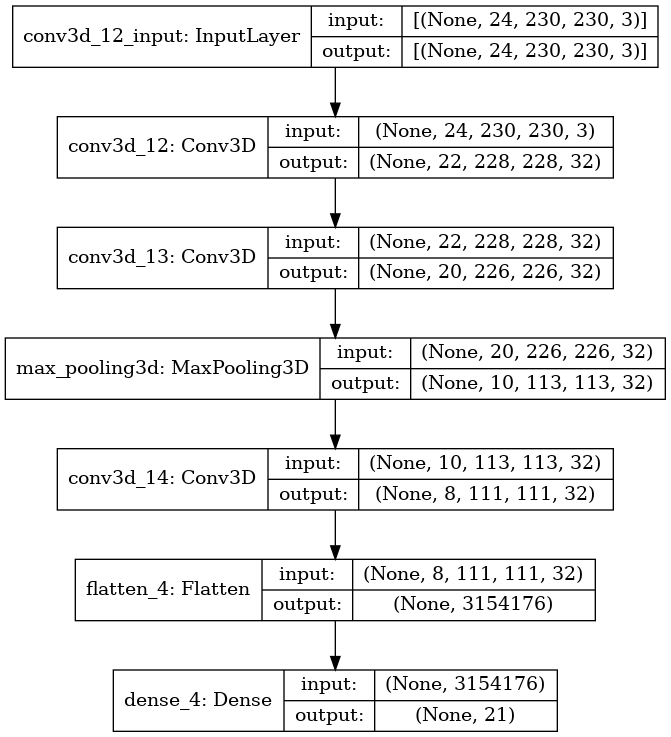

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(model_3D, to_file='model_3D.png', show_shapes=True, show_layer_names=True)

# Convolution 2D

In [38]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout


batch_size = 5
num_classes = 21
num_frames = 24
frame_dim = 230
frame_size = (frame_dim, frame_dim)

model_2D = Sequential()

model_2D.add(ConvLSTM2D(filters = 16, kernel_size=(3,3), activation='LeakyReLU', data_format='channels_last', return_sequences=True, recurrent_dropout=0.2, input_shape=(num_frames,frame_dim, frame_dim, 3)))
model_2D.add(MaxPooling3D(pool_size=(1,2,2), padding='same', data_format='channels_last'))
model_2D.add(TimeDistributed(Dropout(0.2)))

model_2D.add(ConvLSTM2D(filters = 16, kernel_size=(3,3), activation='LeakyReLU', data_format='channels_last', return_sequences=True, recurrent_dropout=0.2))
model_2D.add(MaxPooling3D(pool_size=(1,2,2), padding='same', data_format='channels_last'))
model_2D.add(TimeDistributed(Dropout(0.2)))

model_2D.add(ConvLSTM2D(filters = 16, kernel_size=(3,3), activation='LeakyReLU', data_format='channels_last', return_sequences=True, recurrent_dropout=0.2))
model_2D.add(MaxPooling3D(pool_size=(1,2,2), padding='same', data_format='channels_last'))
model_2D.add(TimeDistributed(Dropout(0.2)))

model_2D.add(ConvLSTM2D(filters = 16, kernel_size=(3,3), activation='LeakyReLU', data_format='channels_last', return_sequences=True, recurrent_dropout=0.2))
model_2D.add(MaxPooling3D(pool_size=(1,2,2), padding='same', data_format='channels_last'))
model_2D.add(TimeDistributed(Dropout(0.2)))

model_2D.add(Flatten())

model_2D.add(Dense(21, activation='softmax') )

# Compile the model
model_2D.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model_2D.summary()



train_gen = video_data_generator_3DCNN(train_video_path_3, train_label_onehot_3, batch_size, num_classes, num_frames, frame_size)
val_gen = video_data_generator_3DCNN(test_video_path_3, test_label_onehot_3, batch_size, num_classes, num_frames, frame_size)

model_2D.fit(train_gen, steps_per_epoch=len(train_video_path_3)//batch_size, epochs=15, validation_data=val_gen, validation_steps=len(test_video_path_3)//batch_size)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 24, 228, 228, 16)  11008     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 24, 114, 114, 16)  0         
_________________________________________________________________
time_distributed (TimeDistri (None, 24, 114, 114, 16)  0         
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 24, 112, 112, 16)  18496     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 24, 56, 56, 16)    0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 24, 56, 56, 16)    0         
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 24, 54, 54, 16)   

ResourceExhaustedError:  OOM when allocating tensor with shape[5,228,228,16] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_5/conv_lst_m2d/while/body/_1/sequential_5/conv_lst_m2d/while/add_6-0-1-TransposeNCHWToNHWC-LayoutOptimizer}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_109725]

Function call stack:
train_function


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_2D, to_file='model_2D.png', show_shapes=True, show_layer_names=True)

## VGG16 extracted features

In [22]:
import os 
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

def video_data_generator_VGG16(video_paths, labels, batch_size, num_classes, num_frames, frame_size, vgg):
    while True:
        # Shuffle the video paths and labels
        indices = np.arange(len(video_paths))
        np.random.shuffle(indices)
        video_paths = [video_paths[i] for i in indices]
        labels = [labels[i] for i in indices]

        folder_path = '/kaggle/input/ucf101/UCF101/UCF-101/'

        # Loop through the video paths in batches
        for i in range(0, len(video_paths), batch_size):
            #print("\n", i)
            # Load the video frames and resize them to frame_size
            video_batch = []
            for path in video_paths[i:i+batch_size]:
                video_path = os.path.join(folder_path, path)
                video_frames = []
                #video_features = []
                video_capture = cv2.VideoCapture(video_path)
                num_frames_video = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
                step = num_frames_video // num_frames
                for j in range(num_frames_video):
                    ret, frame = video_capture.read()
                    if not ret:
                        break
                    if (j % step == 0) and (len(video_frames) < num_frames):
                                #print("\n", j)
                                #print("\nBefore resizing: ",frame)
                                frame_resized = cv2.resize(frame, frame_size)
                                #print("\nAfter resizing", frames_resized)
                                #print("\nFrame shape is: ",frame_resized.shape)
                                #features_frame = vgg.predict(frame_resized)
                                video_frames.append(frame_resized)
                                #video_features = np.vstack((video_features, features_frame))
                                #print("\nvideo features shape is: ",video_features.shape)
                video_capture.release()
                while len(video_frames) < num_frames:
                    video_frames.append(np.zeros((224,224,3)))

                if (np.array(video_frames)).shape != (24, 224, 224, 3):
                     break
                
                video_frames = np.array(video_frames)
                #video_features = np.array(video_features)
                # Preprocess the frames using VGG16 preprocess_input function
                #video_frames = preprocess_input(video_frames)
                # Extract features using VGG16 model
                #print("\nVideo_frames has size: ", video_frames.shape)
                video_features = vgg.predict(video_frames, verbose=0)
                #print("\nVideo_features has size: ", video_features.shape)
                video_features_reshaped = video_features.reshape(num_frames,7*7*512)
                video_batch.append(video_features_reshaped)
            labels_batch = np.array(labels[i:i+batch_size])
            video_batch = np.array(video_batch)
            #print("\nVideo_batch shape is: ", video_batch.shape)
            #print("\nlabels_batch shape is: ", labels_batch.shape)
            
            # Yield the data batch
            yield video_batch, labels_batch


In [27]:
from tensorflow.keras.applications.vgg16 import preprocess_input


batch_size = 5
num_classes = 21
num_frames = 24
frame_size = (224,224)

# Define the VGG16 model to extract features from video frames
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Define the LSTM model to classify the video sequence based on extracted features
lstm = Sequential()
#lstm.add(Flatten(input_shape=(24*7*7*512, )))
lstm.add(LSTM(512, input_shape=(24, 7*7*512), return_sequences=True))
#lstm.add(Dropout(0.5))
#lstm.add(LSTM(32, return_sequences=True))
#lstm.add(LSTM(32, return_sequences=True))
lstm.add(Flatten())
#lstm.add(Dense(256, activation='relu'))
#lstm.add(Dense(32, activation='relu'))
#lstm.add(Dropout(0.5))
lstm.add(Dense(num_classes, activation='softmax'))

lstm.summary()

# Compile the LSTM model
lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



# Train the LSTM model using the video data generator function
train_gen = video_data_generator_VGG16(train_video_path_2, train_label_onehot_2, batch_size, num_classes, num_frames, frame_size, vgg)
val_gen = video_data_generator_VGG16(test_video_path_2, test_label_onehot_2, batch_size, num_classes, num_frames, frame_size, vgg)

lstm.fit(train_gen, steps_per_epoch=len(train_video_path_2)//batch_size, epochs=5, validation_data=val_gen, validation_steps=len(test_video_path_2)//batch_size)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 24, 512)           52430848  
_________________________________________________________________
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 21)                258069    
Total params: 52,688,917
Trainable params: 52,688,917
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
612/612 [==============================] - 950s 2s/step - loss: 1.0777 - accuracy: 0.7098 - val_loss: 1.0934 - val_accuracy: 0.7139
Epoch 2/5
612/612 [==============================] - 902s 1s/step - loss: 0.2933 - accuracy: 0.9157 - val_loss: 1.1069 - val_accuracy: 0.7477
Epoch 3/5
612/612 [==============================] - 900s 1s/step - loss: 0.1765 - accur

## ResNet50 extracted features

In [ ]:
import os 
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

def video_data_generator_ResNet50(video_paths, labels, batch_size, num_classes, num_frames, frame_size, ResNet_model):
    while True:
        # Shuffle the video paths and labels
        indices = np.arange(len(video_paths))
        np.random.shuffle(indices)
        video_paths = [video_paths[i] for i in indices]
        labels = [labels[i] for i in indices]

        folder_path = '/kaggle/input/ucf101/UCF101/UCF-101/'

        # Loop through the video paths in batches
        for i in range(0, len(video_paths), batch_size):
            #print("\n", i)
            # Load the video frames and resize them to frame_size
            video_batch = []
            for path in video_paths[i:i+batch_size]:
                video_path = os.path.join(folder_path, path)
                video_frames = []
                #video_features = []
                video_capture = cv2.VideoCapture(video_path)
                num_frames_video = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
                step = num_frames_video // num_frames
                for j in range(num_frames_video):
                    ret, frame = video_capture.read()
                    if not ret:
                        break
                    if (j % step == 0) and (len(video_frames) < num_frames):
                                #print("\n", j)
                                #print("\nBefore resizing: ",frame)
                                frame_resized = cv2.resize(frame, frame_size)
                                #print("\nAfter resizing", frames_resized)
                                #print("\nFrame shape is: ",frame_resized.shape)
                                #features_frame = vgg.predict(frame_resized)
                                video_frames.append(frame_resized)
                                #video_features = np.vstack((video_features, features_frame))
                                #print("\nvideo features shape is: ",video_features.shape)
                video_capture.release()
                while len(video_frames) < num_frames:
                    video_frames.append(np.zeros((224,224,3)))

                if (np.array(video_frames)).shape != (24, 224, 224, 3):
                  break
                
                video_frames = np.array(video_frames)
                #video_features = np.array(video_features)
                # Preprocess the frames using VGG16 preprocess_input function
                #video_frames = preprocess_input(video_frames)
                # Extract features using VGG16 model
                #print("\nVideo_frames has size: ", video_frames.shape)
                video_features = ResNet_model.predict(video_frames, verbose=0)
                #print("\nVideo_features has size: ", video_features.shape)
                video_features_reshaped = video_features.reshape(num_frames, 7*7*2048)
                video_batch.append(video_features_reshaped)
            labels_batch = np.array(labels[i:i+batch_size])
            video_batch = np.array(video_batch)
            #print("\nVideo_batch shape is: ", video_batch.shape)
            #print("\nlabels_batch shape is: ", labels_batch.shape)
            
            # Yield the data batch
            yield video_batch, labels_batch

In [37]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

batch_size = 5
num_classes = 21
num_frames = 24
frame_size = (224,224)

# Define the VGG16 model to extract features from video frames
ResNet_model= ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Define the LSTM model to classify the video sequence based on extracted features
lstm = Sequential()
#lstm.add(Flatten(input_shape=(24*7*7*512, )))
lstm.add(LSTM(256, input_shape=(24, 7*7*2048), return_sequences=True))
#lstm.add(Dropout(0.5))
#lstm.add(LSTM(32, return_sequences=True))
#lstm.add(LSTM(32, return_sequences=True))
lstm.add(Flatten())
#lstm.add(Dense(256, activation='relu'))
#lstm.add(Dense(32, activation='relu'))
#lstm.add(Dropout(0.5))
lstm.add(Dense(num_classes, activation='softmax'))

lstm.summary()

# Compile the LSTM model
lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



# Train the LSTM model using the video data generator function
train_gen = video_data_generator_ResNet50(train_video_path_2, train_label_onehot_2, batch_size, num_classes, num_frames, frame_size, ResNet_model)
val_gen = video_data_generator_ResNet50(test_video_path_2, test_label_onehot_2, batch_size, num_classes, num_frames, frame_size, ResNet_model)

lstm.fit(train_gen, steps_per_epoch=len(train_video_path_2)//batch_size, epochs=5, validation_data=val_gen, validation_steps=len(test_video_path_2)//batch_size)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 24, 256)           103023616 
_________________________________________________________________
flatten_3 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 21)                129045    
Total params: 103,152,661
Trainable params: 103,152,661
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
612/612 [==============================] - 963s 2s/step - loss: 1.6224 - accuracy: 0.5837 - val_loss: 0.9573 - val_accuracy: 0.7266
Epoch 2/5
612/612 [==============================] - 885s 1s/step - loss: 0.5060 - accuracy: 0.8522 - val_loss: 0.8692 - val_accuracy: 0.7578
Epoch 3/5
612/612 [==============================] - 883s 1s/step - loss: 0.2046 - acc

## Efficient

In [32]:
import os 
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

def video_data_generator_EfficientNetBO(video_paths, labels, batch_size, num_classes, num_frames, frame_size, EfficientNet_model):
    while True:
        # Shuffle the video paths and labels
        indices = np.arange(len(video_paths))
        np.random.shuffle(indices)
        video_paths = [video_paths[i] for i in indices]
        labels = [labels[i] for i in indices]

        folder_path = '/content/drive/MyDrive/UCF-101/'

        # Loop through the video paths in batches
        for i in range(0, len(video_paths), batch_size):
            #print("\n", i)
            # Load the video frames and resize them to frame_size
            video_batch = []
            for path in video_paths[i:i+batch_size]:
                video_path = os.path.join(folder_path, path)
                video_frames = []
                #video_features = []
                video_capture = cv2.VideoCapture(video_path)
                num_frames_video = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
                step = num_frames_video // num_frames
                for j in range(num_frames_video):
                    ret, frame = video_capture.read()
                    if not ret:
                        break
                    if (j % step == 0) and (len(video_frames) < num_frames):
                                #print("\n", j)
                                #print("\nBefore resizing: ",frame)
                                frame_resized = cv2.resize(frame, frame_size)
                                #print("\nAfter resizing", frames_resized)
                                #print("\nFrame shape is: ",frame_resized.shape)
                                #features_frame = vgg.predict(frame_resized)
                                video_frames.append(frame_resized)
                                #video_features = np.vstack((video_features, features_frame))
                                #print("\nvideo features shape is: ",video_features.shape)
                video_capture.release()
                while len(video_frames) < num_frames:
                    video_frames.append(np.zeros((224,224,3)))

                if (np.array(video_frames)).shape != (24, 224, 224, 3):
                  break
                
                video_frames = np.array(video_frames)
                #video_features = np.array(video_features)
                # Preprocess the frames using VGG16 preprocess_input function
                video_frames = preprocess_input(video_frames)
                # Extract features using VGG16 model
                #print("\nVideo_frames has size: ", video_frames.shape)
                video_features = EfficientNet_model.predict(video_frames, verbose=0)
                #print("\nVideo_features has size: ", video_features.shape)
                video_features_reshaped = video_features.reshape(num_frames,7*7*2560)
                video_batch.append(video_features_reshaped)
            labels_batch = np.array(labels[i:i+batch_size])
            video_batch = np.array(video_batch)
            #print("\nVideo_batch shape is: ", video_batch.shape)
            #print("\nlabels_batch shape is: ", labels_batch.shape)
            
            # Yield the data batch
            yield video_batch, labels_batch


In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB7


batch_size = 5
num_classes = 21
num_frames = 24
frame_size = (224,224)

# Define the VGG16 model to extract features from video frames
EfficientNet_model= EfficientNetB7(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Define the LSTM model to classify the video sequence based on extracted features
efficient = Sequential()
#lstm.add(Flatten(input_shape=(24*7*7*512, )))

efficient.add(LSTM(64, input_shape=(24, 7*7*2560), return_sequences=True))
efficient.add(LayerNormalization())
efficient.add(LSTM(64, return_sequences=True))
#lstm.add(Dropout(0.5))
#lstm.add(LSTM(32, return_sequences=True))
#lstm.add(LSTM(32, return_sequences=True))
efficient.add(Flatten())
#lstm.add(Dense(256, activation='relu'))
#lstm.add(Dense(32, activation='relu'))
#lstm.add(Dropout(0.5))
efficient.add(Dense(num_classes, activation='softmax'))

efficient.summary()

# Compile the LSTM model
efficient.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])



# Train the LSTM model using the video data generator function
train_gen = video_data_generator_EfficientNetBO(train_video_path_2, train_label_onehot_2, batch_size, num_classes, num_frames, frame_size, EfficientNet_model)
val_gen = video_data_generator_EfficientNetBO(test_video_path_2, test_label_onehot_2, batch_size, num_classes, num_frames, frame_size, EfficientNet_model)

efficient.fit(train_gen, steps_per_epoch=len(train_video_path_2)//batch_size, epochs=5, validation_data=val_gen, validation_steps=len(test_video_path_2)//batch_size)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 24, 64)            32129280  
_________________________________________________________________
layer_normalization (LayerNo (None, 24, 64)            128       
_________________________________________________________________
lstm_5 (LSTM)                (None, 24, 64)            33024     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 21)                32277     
Total params: 32,194,709
Trainable params: 32,194,709
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
612/612 [==============================] - ETA: 0s - loss: 2.7224 - accuracy: 0.2961